In [20]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import numpy as np
import googlemaps
from matplotlib.path import Path
import geopandas as gpd
import contextily as ctx

In [9]:
df = pd.read_csv('Original-Data.csv')

In [4]:
pd.set_option('display.max_columns', None)

# df

In [7]:
# Check for any missing values and handle them if necessary
df = df.dropna()
print(df.isnull().sum())

# If there are missing values, you can handle them using methods like fillna() or dropna()

# Count the different types in the "Type" column
type_counts = df['Type'].value_counts()

# Display the counts of different types
print()
print(type_counts)

Date                      0
Price                     0
Status                    0
Build Year                0
URL                       0
Adresse                   0
Kort adresse              0
Kvdm                      0
Latitude                  0
Longitude                 0
Kommune                   0
Type                      0
Nearest_Metro_Distance    0
Nearest_Tog_Distance      0
dtype: int64

Type
Ejerlejlighed    76942
Villa            28744
Rækkehus         12386
Name: count, dtype: int64


## retter Kommune navne

In [8]:
df.loc[df['Kommune'] == "Taarnby", 'Kommune'] = "Tarnby" 
df.loc[df['Kommune'] == "Furesoe", 'Kommune'] = "Furesø"
df.loc[df['Kommune'] == "Lyngby-Taarbaek", 'Kommune'] = "Lyngby-Taarbak"
df.loc[df['Kommune'] == "Lyngby-Taarbæk", 'Kommune'] = "Lyngby-Taarbak"
df.loc[df['Kommune'] == "Vallensbæk", 'Kommune'] = "Vallensbak"
df.loc[df['Kommune'] == "Ishoej", 'Kommune'] = "Ishøj"
df.loc[df['Kommune'] == "roedovre", 'Kommune'] = "Rødovre"
df.loc[df['Kommune'] == "broendby", 'Kommune'] = "Brøndby"
df.loc[df['Kommune'] == "taarnby", 'Kommune'] = "Tarnby"
df.loc[df['Kommune'] == "frederiksberg", 'Kommune'] = "Frederiksberg"
df.loc[df['Kommune'] == "Vallensbaek", 'Kommune'] = "Vallensbak"

## Storkøbenhavns grænser

In [14]:
borders = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])

In [16]:
# Create a Path object for the polygon
polygon = Path(borders)

# Filter the DataFrame using the polygon
df_borders = df[df.apply(lambda row: polygon.contains_point((row['Longitude'], row['Latitude'])), axis=1)]

In [21]:
# df_borders

C:\Users\jtami\AppData\Local\Temp\ipykernel_19708\3023957848.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borders['Longitude'] = pd.to_numeric(df_borders['Longitude'], errors='coerce')
C:\Users\jtami\AppData\Local\Temp\ipykernel_19708\3023957848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borders['Latitude'] = pd.to_numeric(df_borders['Latitude'], errors='coerce')
C:\Users\jtami\anaconda3\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 28 is not valid f

AttributeError: 'NoneType' object has no attribute 'shape'

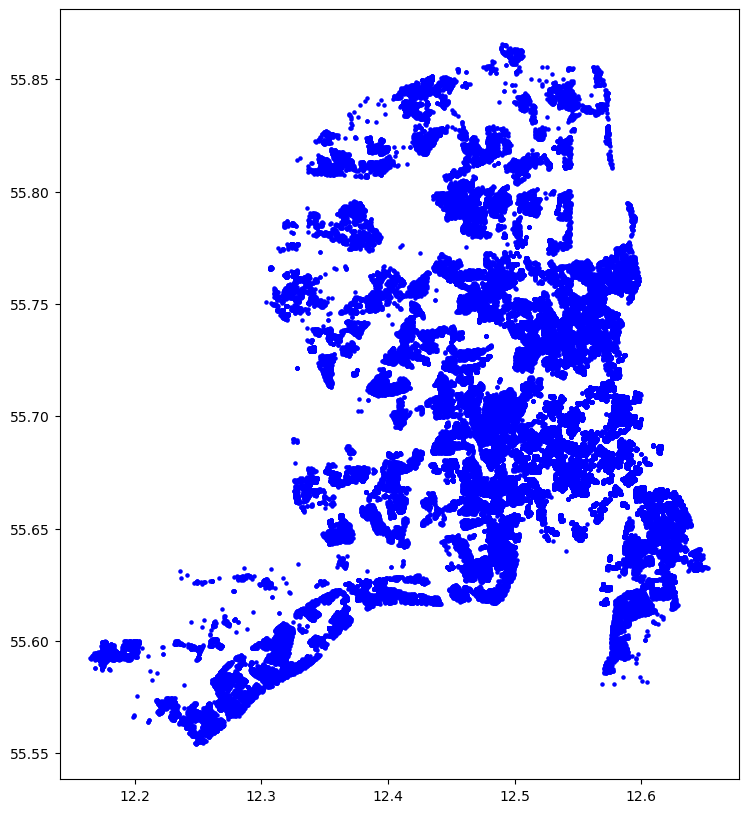

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assume df_borders is your DataFrame with longitude and latitude
# Ensure that the longitude and latitude data types are correct
df_borders['Longitude'] = pd.to_numeric(df_borders['Longitude'], errors='coerce')
df_borders['Latitude'] = pd.to_numeric(df_borders['Latitude'], errors='coerce')

# Drop rows with NaN values in Longitude or Latitude to ensure clean plotting
df_borders = df_borders.dropna(subset=['Longitude', 'Latitude'])

# Convert the DataFrame to a GeoDataFrame
gdf_borders = gpd.GeoDataFrame(df_borders, geometry=gpd.points_from_xy(df_borders.Longitude, df_borders.Latitude))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf_borders.set_crs('epsg:4326', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame
gdf_borders.plot(ax=ax, color='blue', markersize=5)

# Convert the CRS to Web Mercator (EPSG:3857) for contextily
gdf_borders = gdf_borders.to_crs(epsg=3857)

# Add basemap (tile map) with contextily
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Remove axis clutter
ax.set_axis_off()

# Show the plot
plt.show()
